<a href="https://colab.research.google.com/github/MiltonGallardo/MiltonGallardo/blob/main/Reg_log%C3%ADstica%2C_bosque_aleatorio_o_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Milton Gallardo
Tarea:utilizar modelos de regresión logística (uno  a uno y uno frente a todos) y ajustarlos para su rendimiento óptimo. También debes intentar comparar el efecto de cuando intentas utilizar la regularización l1 y l2. Esta es una gran oportunidad para ver qué sucede cuando intentas ajustar un modelo. Después de hacer eso, intenta usar los modelos KNN, Bagged tree y Random Forest.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression



In [ ]:
col_names = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins','Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline']
df = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None, names=col_names)

In [ ]:
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#  programación One versus all

In [ ]:
# Imprimir cuántas clases
print('Class labels', np.unique(df['Class label']))

Class labels [1 2 3]


In [ ]:
# Las clases no están equilibradas
df['Class label'].value_counts(dropna = False)

2    71
1    59
3    48
Name: Class label, dtype: int64

In [ ]:
# Organizar los datos en la matriz de características y el vector de destino
X = df.loc[:, df.columns[(df.columns != 'Class label')]]
y = df.loc[:, 'Class label'].values

In [ ]:
# En encuestas estadísticas,
# cuando las subpoblaciones dentro de una población general varían,copy
# Podría ser ventajoso muestrear cada subpoblación (estrato) de forma independiente
# La estratificación es el proceso de dividir a los miembros de la población en subgrupos homogéneos antes
# del muestreo.
#help(train_test_split)

In [ ]:
# Dividir en conjuntos de prueba y entrenamiento
# Proporcionar la matriz de etiquetas de clase y como argumento para estratificar asegura a ambos
# el conjunto de entrenamiento y los conjuntos de datos de prueba tienen las mismas proporciones de clase que el
# conjunto de datos original
X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.3, 
                                                   random_state=0, 
                                                   stratify=y)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{1: 41, 2: 50, 3: 33}

In [ ]:
# Estandarizar datos
scaler = StandardScaler()
# Ajustar solo al conjunto de entrenamiento
scaler.fit(X_train)
# Aplicar  transform tanto al conjunto de entrenamiento como al conjunto de prueba
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# regresion lod=gistica con penalizaci[on de lasso
log_reg = LogisticRegression(penalty='l1',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [ ]:
# interceptor 
log_reg.intercept_

array([-1.26354625, -1.2159264 , -2.3711464 ])

In [ ]:
# Coeficientes que acompanan a la variable X
log_reg.coef_

array([[ 1.2463357 ,  0.18061749,  0.74603729, -1.16401797,  0.        ,
         0.        ,  1.16118995,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55707482,  2.50868495],
       [-1.53720031, -0.38736723, -0.99507019,  0.36493879, -0.05977267,
         0.        ,  0.66802645,  0.        ,  0.        , -1.93410078,
         1.23358577,  0.        , -2.23199464],
       [ 0.13569725,  0.16939484,  0.35790266,  0.        ,  0.        ,
         0.        , -2.43315263,  0.        ,  0.        ,  1.56128199,
        -0.81770558, -0.49778583,  0.        ]])

In [ ]:
# La primera clase es la puntuación más alta, por lo que será la predicción 0 (la primera clase) para estos datos
log_reg.predict_proba(X_test[0:1])

array([[9.76603147e-01, 4.47720258e-04, 2.29491328e-02]])

In [ ]:
# También podemos obtener la clase asociada con la probabilidad más alta
log_reg.predict(X_test[0:1])

array([1])

In [ ]:
# regresion lod=gistica con penalizaci[on de lasso
log_reg = LogisticRegression(penalty='l2',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.9111111111111111


In [ ]:
# El accuracy l1 es mejor que l2

# One vs One

# Knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# crea modelo
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
print(knn)

KNeighborsClassifier(n_neighbors=3)


In [ ]:
##### entrenar al modelo
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# predecir los valores
predictions = knn.predict(X)

In [ ]:
predictions

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 1, 1, 2, 3, 1, 1, 2, 2, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 2, 2, 1,
       3, 3, 3, 1, 3, 3, 3, 1, 2, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3])

In [ ]:
# Podemos ver las predicciones de prueba para ver qué tan bien nuestro modelo se ajusta a los datos de prueba (verificando la varianza)
test_predictions = knn.predict(X_test)

In [ ]:
# calcular la precisión de la clasificación
score = knn.score(X_test, y_test)
score

0.6444444444444445

# La precisión fue de 64%. Este modelo parece funcionar muy bien. Ajustar nuestro modelo a los mismos datos utilizados para hacer predicciones (y encontrar precisión) El aprendizaje automático consiste en crear modelos que predigan el futuro y no el pasado.

# Arboles de decisión

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [ ]:
# Mirando algunos hiperparámetros que parecen ajustables
clf

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
clf.predict(X_test[0:10])

array([1, 1, 1, 2, 3, 2, 1, 1, 2, 2])

In [ ]:
# calcular la precisión de clasificación
score = clf.score(X_test, y_test)
score

0.8

# La precisión fue de 80%. Este modelo parece funcionar  bien. 

# Bosques aleatorios 

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = df.loc[:, df.columns != 'Class label']


In [ ]:
y = df.loc[:, 'Class label'].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [ ]:
clf = RandomForestClassifier(n_estimators=100,
                             bootstrap=True,
                             oob_score=True)

In [ ]:
# Mirando algunos hiperparámetros que parecen ajustables
clf

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [ ]:
clf.predict(X_test.iloc[0].values.reshape(1, -1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [ ]:
clf.predict(X_test[0:10])

array([1, 1, 1, 2, 3, 1, 1, 2, 2, 1])

In [ ]:
######### Precisión nula al predecir la clase más frecuente

# Dado que se requieren etiquetas de clase para determinar el grado de desequilibrio de clases,
#  la clase imblanace se mide típicamente con respecto a la distribución del entrenamiento.
pd.DataFrame(y_train)[0].value_counts(dropna = False)

2    53
1    41
3    39
Name: 0, dtype: int64

In [ ]:
# Cuanto el valor 1 en el total de la data
41 / (41+53+39)

0.3082706766917293

In [ ]:
score = clf.score(X_test, y_test)
score

0.9777777777777777

In [ ]:
# buen modelo de clasificacion
clf.oob_score_

0.9849624060150376

# Regresión Ridge RSS Ridge  L2

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

# Regresión Ridge RSS Lasso L2

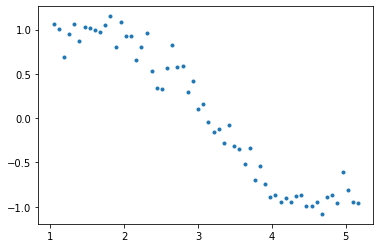

In [ ]:
#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')